In [1]:
import sys
import pathlib
import warnings
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../../../")
from utils import data_utils

# ignore all warnings
warnings.filterwarnings("ignore")


Loading the data 

In [2]:
data_path = pathlib.Path("../UMAP-aggregated-fs-profiles/results/concat_data/batch_1_concat_agg_fs.csv")

# setting output path
output_path = pathlib.Path("results/")
output_path.mkdir(parents=True, exist_ok=True)

In [3]:
concat_profile_df = pd.read_csv(data_path)
meta_cols, feat_cols = data_utils.split_meta_and_features(concat_profile_df)

In [4]:
treatment_df = concat_profile_df[["Metadata_treatment"] + feat_cols].sort_values("Metadata_treatment").reset_index(drop=True)
treatment_morph_df = treatment_df.drop(columns=["Metadata_treatment"])
treatment_df.head()

,Metadata_treatment,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_MajorAxisLength,Cytoplasm_AreaShape_Zernike_4_0,Cytoplasm_AreaShape_Zernike_5_1,Cytoplasm_AreaShape_Zernike_6_0,Cytoplasm_AreaShape_Zernike_6_2,Cytoplasm_AreaShape_Zernike_7_1,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_AreaShape_Zernike_8_0,...,Nuclei_Texture_InfoMeas2_PM_3_03_256,Nuclei_Texture_InverseDifferenceMoment_Hoechst_3_00_256,Nuclei_Texture_InverseDifferenceMoment_Hoechst_3_01_256,Nuclei_Texture_InverseDifferenceMoment_Hoechst_3_02_256,Nuclei_Texture_InverseDifferenceMoment_Hoechst_3_03_256,Nuclei_Texture_InverseDifferenceMoment_PM_3_00_256,Nuclei_Texture_InverseDifferenceMoment_PM_3_01_256,Nuclei_Texture_InverseDifferenceMoment_PM_3_02_256,Nuclei_Texture_InverseDifferenceMoment_PM_3_03_256,Nuclei_Texture_SumEntropy_PM_3_01_256
0,DMSO-negative,-0.198956,-0.106689,-0.348606,-0.082967,-0.224869,-0.068371,-0.102477,-0.034102,-0.179189,...,-0.044953,0.010825,-0.012729,-0.004153,-0.022002,0.325209,0.361772,0.333603,0.272656,-0.244983
1,DMSO-negative,0.091528,0.230632,-0.270758,-0.129300,-0.312586,-0.155484,-0.132826,-0.057000,-0.309411,...,-0.049056,0.083575,0.092151,0.088480,0.092288,0.639057,0.622445,0.616880,0.597061,-0.506277
2,DMSO-negative,-0.121588,-0.106728,-0.177181,-0.175708,-0.314407,-0.101337,-0.023813,-0.030852,-0.253259,...,-0.021414,0.158093,0.142797,0.226571,0.161546,0.418346,0.352103,0.383600,0.401139,-0.374596
3,DMSO-negative,-0.406263,-0.145079,-0.168198,-0.086716,-0.314530,-0.117304,-0.169563,-0.231082,-0.279639,...,0.260091,-0.162179,-0.082156,-0.069119,-0.063091,0.185064,0.138208,0.140990,0.164959,-0.129081
4,DMSO-negative,-0.049036,-0.119735,-0.170583,0.001536,-0.249905,-0.140756,0.047738,-0.141460,-0.042657,...,-0.168664,0.031591,0.086634,0.136427,0.090396,0.569386,0.633833,0.671764,0.622790,-0.639965


In [5]:
# calculate the correlation 
treatment_corr_matrix = treatment_morph_df.corr(method="pearson")

## Correlation matrix sorted by treatment name

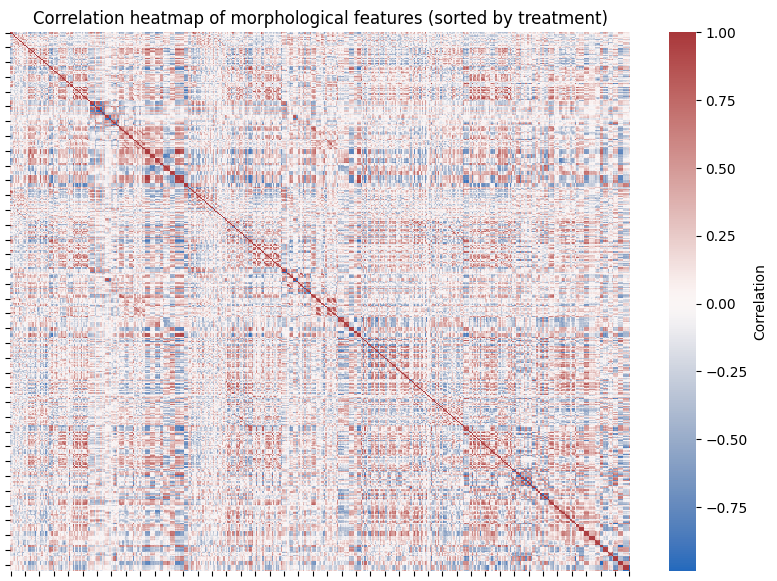

In [6]:
# Set the figure size and resolution
plt.figure(figsize=(10, 7))

# Plot the heatmap of the correlation matrix of morphological features
corr_heatmap = sns.heatmap(treatment_corr_matrix, cmap="vlag")

# Remove the x and y axis tick labels for better visualization
corr_heatmap.set(xticklabels=[])
corr_heatmap.set(yticklabels=[])

# Set the title of the heatmap
corr_heatmap.set_title("Correlation heatmap of morphological features (sorted by treatment)")

# Set the title of the color bar (legend)
corr_heatmap.collections[0].colorbar.set_label("Correlation")

# save the correlation heatmap
plt.savefig(output_path / "correlation_heatmap.png", dpi=500)

# Display the heatmap
corr_heatmap;


## Correlation correlation dendogram

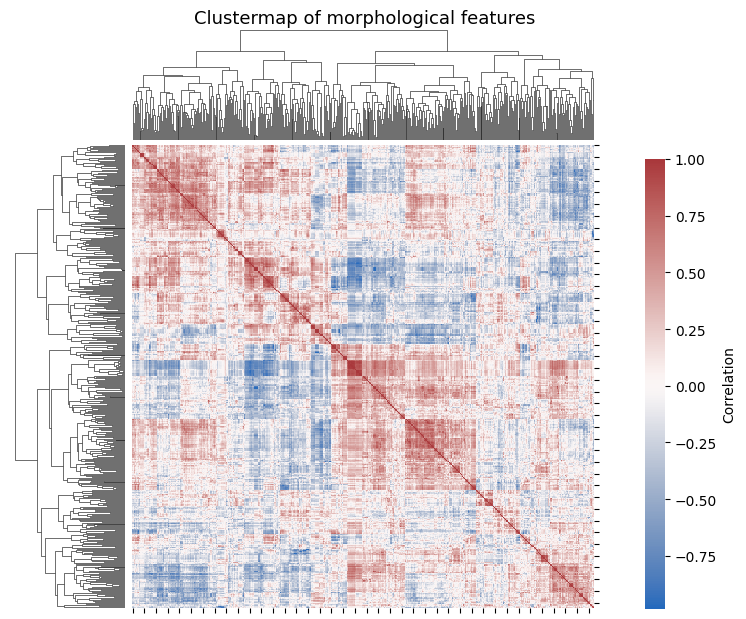

In [7]:
# generate seaborn clustermap with a larger figure size
clustermap = sns.clustermap(
    treatment_morph_df.corr(method="pearson"), cmap="vlag", figsize=(10, 10)
)

# Set the title of the clustermap
clustermap.fig.suptitle("Clustermap of morphological features", x=0.37, y=1., fontsize=13)

# next remove the X and Y axis labels for better visualization
clustermap.ax_heatmap.set(xticklabels=[])
clustermap.ax_heatmap.set(yticklabels=[])

# move color gradient to the left side 
clustermap.ax_heatmap.collections[0].colorbar.set_label("Correlation")
clustermap.cax.set_position([0.650, 0.4, 0.02, 0.45])

# save the clustermap to a file
clustermap.savefig(output_path / "clustermap_morph_features.png", dpi=500)
clustermap;
